In [348]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [349]:
data = pd.read_csv('CPI.csv',parse_dates=True)

In [350]:
data['date'] = pd.to_datetime(data['date']).dt.date

In [351]:
data['day'] = pd.to_datetime(data['date']).dt.day

In [352]:
df = data[data['day']==1]

In [353]:
df.head(5)

,date,CPI,day
8,2008-08-01,100.52510,1
39,2008-09-01,100.12380,1
69,2008-10-01,99.98538,1
100,2008-11-01,98.97539,1
130,2008-12-01,97.07973,1


In [354]:
df.drop(['day'], axis=1,inplace=True)

C:\Users\zhaox\AppData\Local\Temp\ipykernel_5520\1338584623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['day'], axis=1,inplace=True)


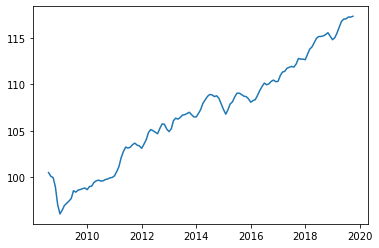

In [355]:
plt.plot('date','CPI',data=df)

In [356]:
df['Month']= pd.to_datetime(data['date']).dt.month

C:\Users\zhaox\AppData\Local\Temp\ipykernel_5520\266354192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= pd.to_datetime(data['date']).dt.month


In [357]:
df=df.reset_index(drop=True)

In [358]:
df = df.dropna()

In [359]:
df['Index'] = df.index

In [360]:
X_train = df[df['date']<pd.to_datetime("2013-10-01")]['Index']

C:\Users\zhaox\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [361]:
X_test = df[df['date']>pd.to_datetime("2013-10-01")]['Index']

In [362]:
Y_train = df[df['date']<pd.to_datetime("2013-10-01")]['CPI']
Y_test = df[df['date']>pd.to_datetime("2013-10-01")]['CPI']

In [363]:
lm = LinearRegression()
lm.fit(np.array(X_train).reshape(-1,1),Y_train)
lm.coef_

array([0.16649262])

In [364]:
lm.intercept_

96.67415192012288

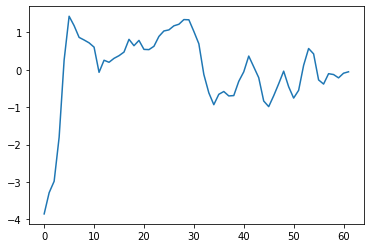

In [365]:
prediction = lm.predict(np.array(X_train).reshape(-1,1))
plt.plot(X_train,prediction-Y_train)

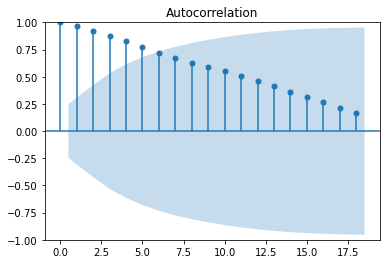

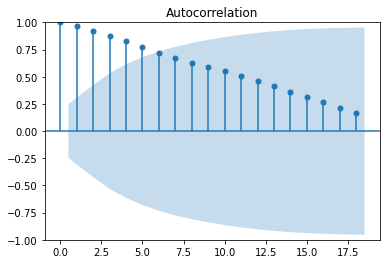

In [366]:
import statsmodels.api
import statsmodels
statsmodels.graphics.tsaplots.plot_acf(Y_train)

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


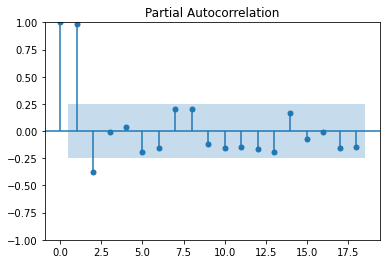

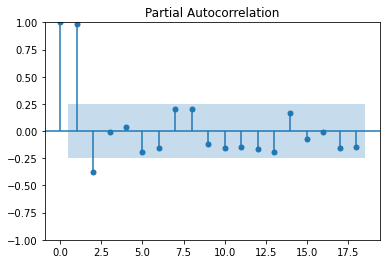

In [367]:
statsmodels.graphics.tsaplots.plot_pacf(Y_train)

In [368]:
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(Y_train,lags=2,trend='n').fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CPI   No. Observations:                   62
Model:                     AutoReg(2)   Log Likelihood                 -26.786
Method:               Conditional MLE   S.D. of innovations              0.378
Date:                Wed, 03 Aug 2022   AIC                             59.571
Time:                        16:04:38   BIC                             65.854
Sample:                             2   HQIC                            62.029
                                   62                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CPI.L1         1.5398      0.107     14.369      0.000       1.330       1.750
CPI.L2        -0.5392      0.107     -5.027      0.000      -0.749      -0.329
                                    Roots           

In [369]:
prediction = res.predict(start=63, end=134)
print(metrics.mean_squared_error(Y_test, prediction))

1.2672094593498524


In [370]:
df

,date,CPI,Month,Index
0,2008-08-01,100.52510,8,0
1,2008-09-01,100.12380,9,1
2,2008-10-01,99.98538,10,2
3,2008-11-01,98.97539,11,3
4,2008-12-01,97.07973,12,4
...,...,...,...,...
130,2019-06-01,117.03590,6,130
131,2019-07-01,117.05920,7,131
132,2019-08-01,117.25480,8,132
133,2019-09-01,117.24880,9,133


In [371]:
df["inflation"]=0
for i in range(1,134):
    df["inflation"][i]=(df["CPI"][i]-df["CPI"][i-1])/df["CPI"][i-1]*100
df

C:\Users\zhaox\AppData\Local\Temp\ipykernel_5520\2120933962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["inflation"][i]=(df["CPI"][i]-df["CPI"][i-1])/df["CPI"][i-1]*100


,date,CPI,Month,Index,inflation
0,2008-08-01,100.52510,8,0,0.000000
1,2008-09-01,100.12380,9,1,-0.399204
2,2008-10-01,99.98538,10,2,-0.138249
3,2008-11-01,98.97539,11,3,-1.010138
4,2008-12-01,97.07973,12,4,-1.915284
...,...,...,...,...,...
130,2019-06-01,117.03590,6,130,0.212866
131,2019-07-01,117.05920,7,131,0.019908
132,2019-08-01,117.25480,8,132,0.167095
133,2019-09-01,117.24880,9,133,-0.005117


Text(0.5, 1.0, 'Inflation Method 1')

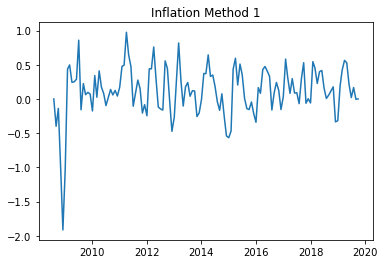

In [372]:
plt.plot('date','inflation',data=df)
plt.title('Inflation Method 1')

In [373]:
df[df['date']==pd.to_datetime("2013-02-01")]['inflation']

C:\Users\zhaox\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


54    0.295723
Name: inflation, dtype: float64

In [374]:
df[df['date']==pd.to_datetime("2013-01-01")]

,date,CPI,Month,Index,inflation
53,2013-01-01,104.9293,1,53,-0.269264


In [375]:
df["inflation2"]=0
for i in range(1,134):
    df["inflation2"][i]=(np.log(df["CPI"][i])-np.log(df["CPI"][i-1]))*100
df

C:\Users\zhaox\AppData\Local\Temp\ipykernel_5520\777313346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["inflation2"][i]=(np.log(df["CPI"][i])-np.log(df["CPI"][i-1]))*100


,date,CPI,Month,Index,inflation,inflation2
0,2008-08-01,100.52510,8,0,0.000000,0.000000
1,2008-09-01,100.12380,9,1,-0.399204,-0.400003
2,2008-10-01,99.98538,10,2,-0.138249,-0.138344
3,2008-11-01,98.97539,11,3,-1.010138,-1.015274
4,2008-12-01,97.07973,12,4,-1.915284,-1.933863
...,...,...,...,...,...,...
130,2019-06-01,117.03590,6,130,0.212866,0.212639
131,2019-07-01,117.05920,7,131,0.019908,0.019906
132,2019-08-01,117.25480,8,132,0.167095,0.166955
133,2019-09-01,117.24880,9,133,-0.005117,-0.005117


Text(0.5, 1.0, 'Inflation Method 2')

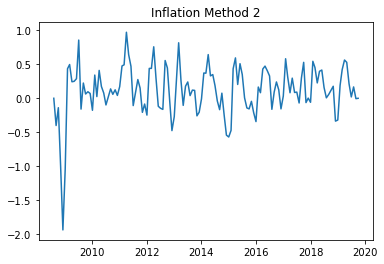

In [376]:
plt.plot('date','inflation2',data=df)
plt.title('Inflation Method 2')

In [377]:
df[df['date']==pd.to_datetime("2013-02-01")]['inflation2']

C:\Users\zhaox\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


54    0.295287
Name: inflation2, dtype: float64

In [378]:
df['date'] = pd.to_datetime(df['date'])
months = df['date'].dt.year * 12 + df['date'].dt.month
df['index'] = months - min(months)+8
df.drop(columns=['Month','Index'],inplace=True)
df.head(5)

,date,CPI,inflation,inflation2,index
0,2008-08-01,100.52510,0.000000,0.000000,8
1,2008-09-01,100.12380,-0.399204,-0.400003,9
2,2008-10-01,99.98538,-0.138249,-0.138344,10
3,2008-11-01,98.97539,-1.010138,-1.015274,11
4,2008-12-01,97.07973,-1.915284,-1.933863,12


In [379]:
df.set_index('index', inplace=True)
df.head(5)

,date,CPI,inflation,inflation2
index,,,,
8,2008-08-01,100.52510,0.000000,0.000000
9,2008-09-01,100.12380,-0.399204,-0.400003
10,2008-10-01,99.98538,-0.138249,-0.138344
11,2008-11-01,98.97539,-1.010138,-1.015274
12,2008-12-01,97.07973,-1.915284,-1.933863


In [380]:
x_train = df[df['date']<pd.to_datetime('2013-09-01')].index
x_test = df[df['date']>=pd.to_datetime('2013-09-01')].index
y_train= df[df['date']<pd.to_datetime('2013-09-01')]['inflation']
y_test = df[df['date']>=pd.to_datetime('2013-09-01')]['inflation']

In [381]:
lm = LinearRegression()
lm.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

Text(0.5, 1.0, 'Residual Plot for Detrended Training Data')

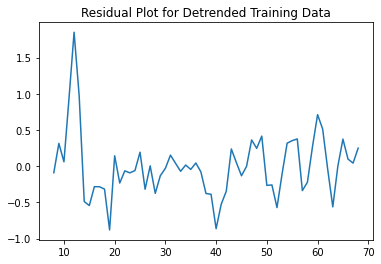

In [383]:
prediction = lm.predict(np.array(x_train).reshape(-1,1))
residual = prediction - y_train
plt.plot(residual)
plt.title("Residual Plot for Detrended Training Data")

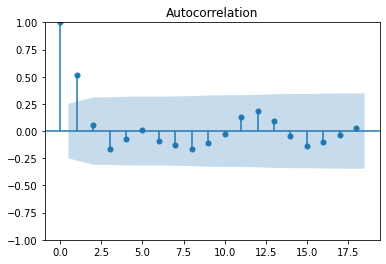

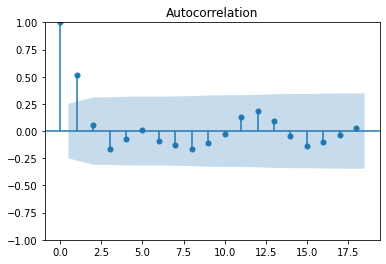

In [384]:
statsmodels.graphics.tsaplots.plot_acf(residual)

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


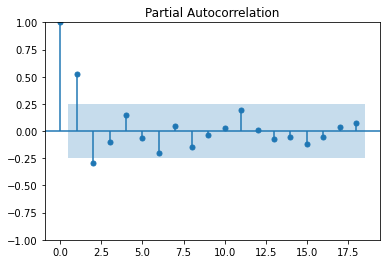

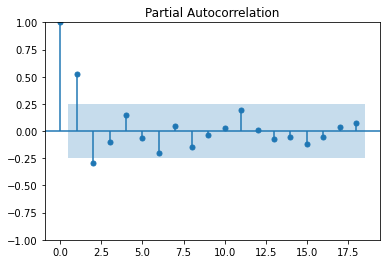

In [385]:
statsmodels.graphics.tsaplots.plot_pacf(residual)

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarn

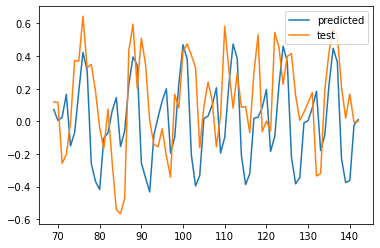

In [386]:
from statsmodels.tsa.arima.model import ARIMA
res = ARIMA(residual,trend='n', order=(2, 0, 0),seasonal_order = (3,1,2,12)).fit()
prediction_R = res.predict(start=69,end=142)
prediction_test = lm.predict(np.array(x_test).reshape(-1,1))
plt.plot(x_test,prediction_R)
plt.plot(x_test, y_test)
plt.legend(["predicted","test"],loc='upper right')

In [228]:
# dict = {}
# for i in range(12):
#     res = ARIMA(residual,trend='n', order=(i, 0, 0),seasonal_order = (3,1,2,12)).fit()
#     prediction_R = res.predict(start=69,end=142)
#     dict[i] = metrics.mean_squared_error(y_test, prediction_R)

    
# dict = sorted(dict.items())
# x, y = zip(*dict) # unpack a list of pairs into two tuples

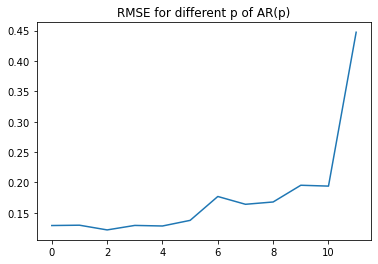

In [229]:
plt.plot(x, y)
plt.title("RMSE for different p of AR(p)")
plt.show()

## BER Prediction

In [230]:
BER = pd.read_csv('T10YIE.csv')
BER.head(5)

,DATE,T10YIE
0,2003-01-02,1.64
1,2003-01-03,1.62
2,2003-01-06,1.63
3,2003-01-07,1.62
4,2003-01-08,1.71


In [148]:
dfber = BER.copy()
dfber['DATE'] = pd.to_datetime(dfber['DATE'])
dfber['day'] = pd.to_datetime(dfber['DATE']).dt.day
dfber = dfber[dfber['day']==1]
dfber.head(5)

,DATE,T10YIE,day
63,2003-04-01,1.82,1
85,2003-05-01,1.75,1
128,2003-07-01,1.64,1
151,2003-08-01,2.04,1
172,2003-09-01,NaN,1


In [149]:
dfber.drop(['day'], axis=1,inplace=True)
dfber['Month']= pd.to_datetime(dfber['DATE']).dt.month
dfber = dfber.rename(columns={'DATE':'Date'})
dfber = dfber.dropna()
dfber.head(5)

,Date,T10YIE,Month
63,2003-04-01,1.82,4
85,2003-05-01,1.75,5
128,2003-07-01,1.64,7
151,2003-08-01,2.04,8
194,2003-10-01,2.00,10


In [150]:
dfber['T10YIE']=(dfber['T10YIE']/100+1)**(1/12)-1

In [151]:
dfber[dfber['Date']==pd.to_datetime("2013-02-01")]

,Date,T10YIE,Month
2631,2013-02-01,0.002133,2


In [152]:
months = dfber['Date'].dt.year * 12 + dfber['Date'].dt.month
dfber['index'] = months - min(months) +4
dfber.head(5)

,Date,T10YIE,Month,index
63,2003-04-01,0.001504,4,4
85,2003-05-01,0.001447,5,5
128,2003-07-01,0.001357,7,7
151,2003-08-01,0.001684,8,8
194,2003-10-01,0.001652,10,10


In [153]:
dfber.set_index('index', inplace=True)
dfber.head(5)

,Date,T10YIE,Month
index,,,
4,2003-04-01,0.001504,4
5,2003-05-01,0.001447,5
7,2003-07-01,0.001357,7
8,2003-08-01,0.001684,8
10,2003-10-01,0.001652,10


In [154]:
x_train = dfber[dfber['Date']<=pd.to_datetime("2013-09-01")].index
x_test = dfber[dfber['Date']>pd.to_datetime("2013-09-01")].index
y_train = dfber[dfber['Date']<=pd.to_datetime("2013-09-01")]['T10YIE']
y_test = dfber[dfber['Date']>pd.to_datetime("2013-09-01")]['T10YIE']

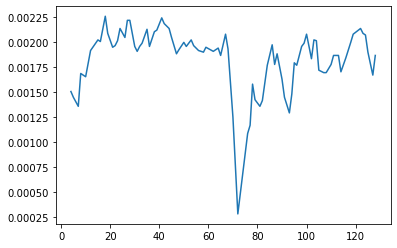

In [155]:
plt.plot(x_train,y_train)

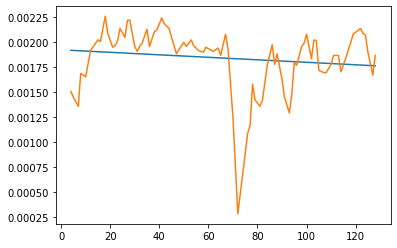

In [156]:
reg_model = LinearRegression()
reg_model.fit(np.array(x_train).reshape(-1, 1), y_train)

prediction = reg_model.predict(np.array(x_train).reshape(-1, 1))
plt.plot(x_train,prediction)
plt.plot(x_train,y_train)

Text(0.5, 1.0, 'Residual Plot for Detrended Training Data')

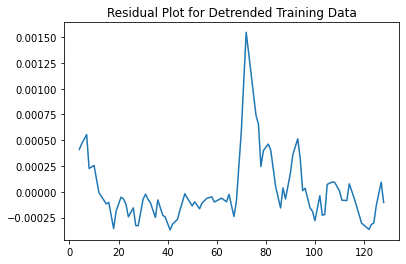

In [157]:
residual = prediction - y_train
plt.plot(residual)
plt.title("Residual Plot for Detrended Training Data")

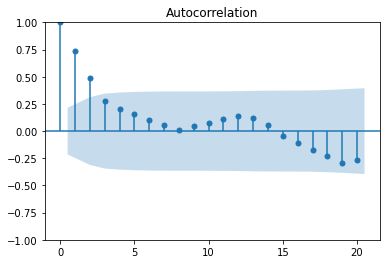

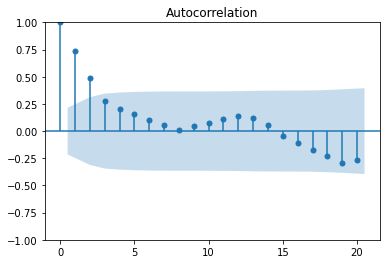

In [158]:
statsmodels.graphics.tsaplots.plot_acf(residual)

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


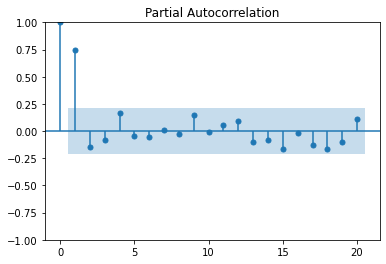

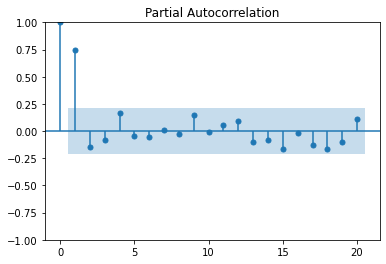

In [159]:
statsmodels.graphics.tsaplots.plot_pacf(residual)

In [160]:
from statsmodels.tsa.arima.model import ARIMA
res = ARIMA(residual,trend='n', order=(3, 1, 2)).fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 T10YIE   No. Observations:                   83
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 579.554
Date:                Wed, 03 Aug 2022   AIC                          -1147.107
Time:                        15:02:50   BIC                          -1132.667
Sample:                             0   HQIC                         -1141.310
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0959      0.035      2.709      0.007       0.027       0.165
ar.L2          0.0375      0.053      0.711      0.477      -0.066       0.141
ar.L3         -0.2702      0.022    -12.294      0.0

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [161]:
predictionTrain = reg_model.predict(np.array(x_train).reshape(-1, 1))
predictionTest = reg_model.predict(np.array(x_test).reshape(-1, 1))

In [162]:
predictionTrend = np.concatenate((predictionTrain,predictionTest))
predictionR = res.predict(0,203)
predictionRes = predictionR[dfber.index.to_list()]
prediction = predictionTrend + predictionRes

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Month Sequence')

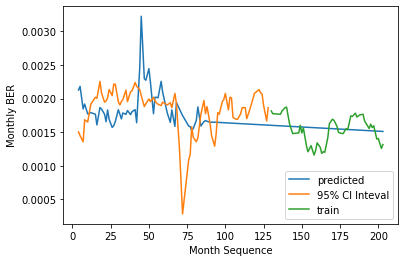

In [163]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

plt.plot(prediction)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.legend(["predicted","95% CI Inteval","train","test"],loc='lower right')
plt.ylabel("Monthly BER")
plt.xlabel("Month Sequence")

## Add BER to Inflation

In [306]:
#dfber['T10YIE']=dfber['T10YIE']*100
dfber.head(5)

,Date,T10YIE,Month
index,,,
4,2003-04-01,0.150416,4
5,2003-05-01,0.144677,5
7,2003-07-01,0.135650,7
8,2003-08-01,0.168431,8
10,2003-10-01,0.165158,10


In [307]:
dfber08 = dfber[dfber['Date']>='2008-08-01']
months = (dfber08['Date'].dt.year * 12 + dfber['Date'].dt.month).dropna()
dfber08['index'] = months - min(months) +8
dfber08.set_index('index',inplace=True)
dfber08

C:\Users\zhaox\AppData\Local\Temp\ipykernel_5520\10067337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfber08['index'] = months - min(months) +8


,Date,T10YIE,Month
index,,,
8.0,2008-08-01,0.192939,8
10.0,2008-10-01,0.124971,10
12.0,2008-12-01,0.028289,12
16.0,2009-04-01,0.108517,4
17.0,2009-05-01,0.116747,5
...,...,...,...
137.0,2019-05-01,0.159428,5
139.0,2019-07-01,0.139754,7
140.0,2019-08-01,0.140575,8


In [308]:
dffinal = pd.concat([df, dfber08['T10YIE']],axis=1)
dffinal.dropna(axis=0, inplace=True)
dffinal.drop(index=8, inplace=True)

In [310]:
dffinal.head(5)

,date,CPI,inflation,inflation2,T10YIE
index,,,,,
10.0,2008-10-01,99.98538,-0.138249,-0.138344,0.124971
12.0,2008-12-01,97.07973,-1.915284,-1.933863,0.028289
16.0,2009-04-01,97.20951,0.243179,0.242884,0.108517
17.0,2009-05-01,97.45218,0.249636,0.249325,0.116747
18.0,2009-06-01,97.73370,0.288880,0.288464,0.157790


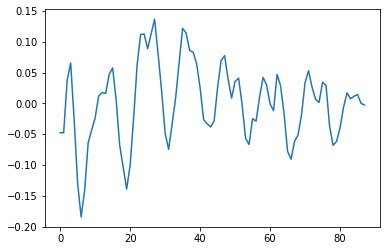

In [309]:
plt.plot(sm.tsa.stattools.ccf(df['inflation'], dfber08['T10YIE'], adjusted=False))

In [398]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(endog = dffinal['inflation'],exog = dffinal['T10YIE'],trend='n',order=(2, 0, 2),seasonal_order=(3,1,3,12))
results = model.fit()
print(results .summary())

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                         
Dep. Variable:                                inflation   No. Observations:                   86
Model:             ARIMA(2, 0, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                 -19.051
Date:                                  Wed, 03 Aug 2022   AIC                             62.101
Time:                                          16:10:47   BIC                             89.750
Sample:                                               0   HQIC                            73.131
                                                   - 86                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T10YIE         3.8231      1.028      3.721      0.000       1.809

C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\zhaox\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Month Sequence')

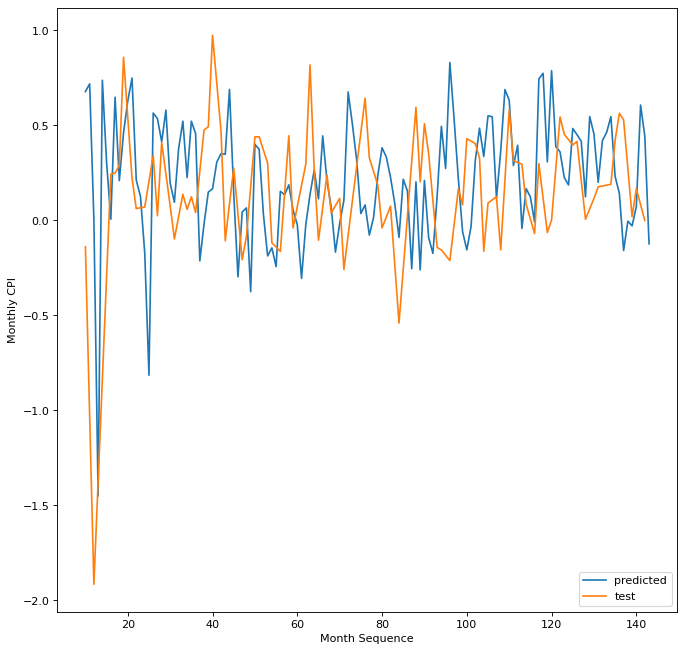

In [419]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from matplotlib.pyplot import figure
prediction = results.predict(10,143,exog=dffinal['T10YIE'][:100])

figure(figsize=(10, 10), dpi=80)
plt.plot(prediction)
plt.plot(dffinal['inflation'])
plt.legend(["predicted","test"],loc='lower right')
plt.ylabel("Monthly CPI")
plt.xlabel("Month Sequence")